In [10]:
import sys

# setting path
sys.path.append('../baseline/contrastive-equilibrium-learning/')


In [22]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [32]:
import os
import random
from scipy.io import wavfile

data_root = '/home/hyeons/workspace/DB/vox1_test/wav/'

# List all folders in the data_root directory
all_folders = [f for f in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, f))]

# Randomly select 16 folders
id_list = random.sample(all_folders, 16)
wav_list = []
for folder_id in id_list:
    # Path to the selected folder
    folder_path = os.path.join(data_root, folder_id)

    # List all subfolders in the selected folder
    subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    # Randomly select a subfolder
    if subfolders:
        selected_subfolder = random.choice(subfolders)
        subfolder_path = os.path.join(folder_path, selected_subfolder)

        # List all wave files in the selected subfolder
        wave_files = [f for f in os.listdir(subfolder_path) if f.endswith('.wav')]

        # Randomly select a wave file and load it
        if wave_files:
            selected_wave_file = random.choice(wave_files)
            wave_file_path = os.path.join(subfolder_path, selected_wave_file)
            wav_list.append(wave_file_path)

print(wav_list)


['/home/hyeons/workspace/DB/vox1_test/wav/id10286/L2jRsPDZGgw/00012.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10283/x6M3KQ8-gM4/00001.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10294/JUyxHgPHR-s/00002.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10300/mYSVs_d1aMQ/00008.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10280/Np6typH1VKE/00002.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10309/GyJHpVQmcvc/00003.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10282/nYsLbFOQfOI/00001.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10289/3g9CjhcNEWk/00004.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10288/FIxC_PNJNkc/00005.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10290/dDnqp9503Mg/00011.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10275/pV6cJibX6Ik/00003.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10302/VRCidrXwd1s/00003.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10308/Tzs_CTbHT9Y/00001.wav', '/home/hyeons/workspace/DB/vox1_test/wav/id10276/Y

In [48]:
from SpeakerNet import SpeakerNet

model = SpeakerNet(lr = 0.0001, model="ResNetSE34L", nOut = 512, encoder_type = 'SAP', normalize = True, unif_loss='uniform', sim_loss='anglecontrast', lambda_u=1, lambda_s=1, t=2, sample_type='PoN').to(device)
model.loadParameters('../baseline/contrastive-equilibrium-learning/save/pre-trained_unspv_unif-a-prot.model')

# visualize 16 person's similarity in 16 x 16 matrix with vox1_test
sim_matrix = [[0 for i in range(16)] for j in range(16)]
for i, wav1 in enumerate(wav_list):
    for j, wav2 in enumerate(wav_list):
        sim_matrix[i][j] = model.get_embedding(wav1, wav2)[1].mean().item()

Embedding size is 512, encoder SAP.
Initialised Uniformity Loss, t=2.0
Initialised AngleContrastive
Initialised network with nOut 512 encoder_type SAP, lambda_u = 1.00, lambda_s = 1.00, t = 2.00
[ 58  43  30 ... 164 224 280]
[ 58  43  30 ... 164 224 280]
[ 58  43  30 ... 164 224 280]
[ 21  25  31 ... -32 -59 -93]
[ 58  43  30 ... 164 224 280]
[ 1396   973   435 ... -1202 -1120 -1042]
[ 58  43  30 ... 164 224 280]
[107 186 242 ...  -6 -85  86]
[ 58  43  30 ... 164 224 280]
[-65 -25 -22 ... 144 135 145]
[ 58  43  30 ... 164 224 280]
[-543 -893 -943 ...  273  -49 1292]
[ 58  43  30 ... 164 224 280]
[-59 -46  40 ... -54 197 102]
[ 58  43  30 ... 164 224 280]
[-450 -425 -637 ...   38 -126 -169]
[ 58  43  30 ... 164 224 280]
[-227 -103   66 ...  100  219  115]
[ 58  43  30 ... 164 224 280]
[  -32   -41   -55 ...  -430 -1116 -2580]
[ 58  43  30 ... 164 224 280]
[-1185 -1351 -1614 ...  1025  1289  1120]
[ 58  43  30 ... 164 224 280]
[-555 -539 -506 ...  -29  -41  -63]
[ 58  43  30 ... 164 224 

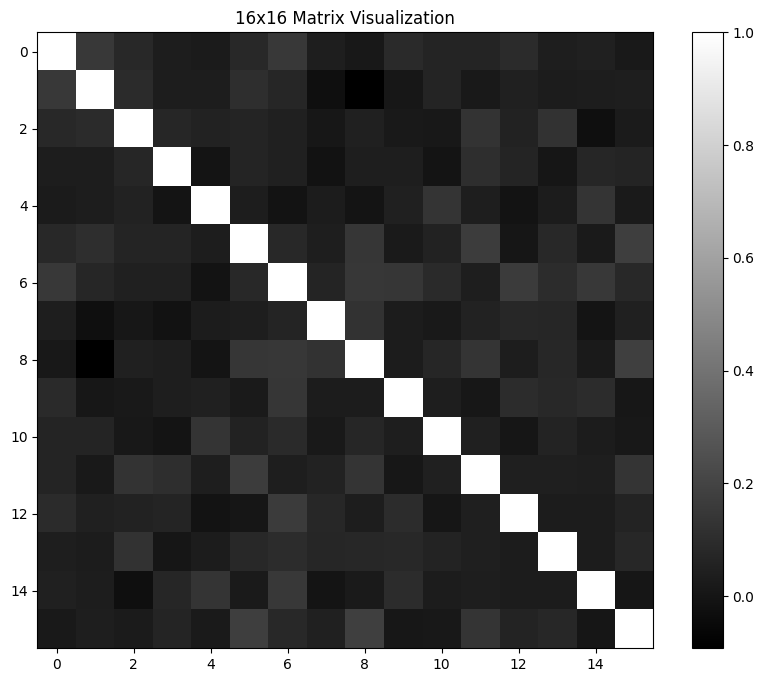

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(sim_matrix, cmap='gray', interpolation='none')
plt.title('16x16 Matrix Visualization')
plt.colorbar() 
plt.show()